In [1]:
#importing the python librery 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
#read the data with help of pandas
df= pd.read_csv('new_heart.csv')

# Data Cleaning 

In [3]:
#check the how many row and column in the dataset 
df.shape

(303, 14)

In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
#dicription of dataset
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
#info of column which data type they contains  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
#checking the value is null or not 
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [62]:
#see the values of dataset
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [9]:
#checking the there is any duplicate value or not 
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool

#we didn't find any duplicate value

In [10]:
#check the sex count
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [11]:
#check the cholostrol counts
df.chol.value_counts()

chol
204    6
197    6
234    6
269    5
254    5
      ..
284    1
224    1
167    1
276    1
131    1
Name: count, Length: 152, dtype: int64

In [12]:
#Dataset Description:
#Variable	Description
#age=Age of the patient in years
#sex=Gender of the patient (0 = male, 1 = female)
#cp = Chest pain type:
#0: Typical angina
#1: Atypical angina
#2: Non-anginal pain
#3: Asymptomatic
#trestbps =Resting blood pressure in mm Hg
#chol =Serum cholesterol in mg/dl
#fbs =Fasting blood sugar level, categorized as above 120 mg/dl (1 = true, 0 = false)
#restecg =Resting electrocardiographic results:
#0: Normal
#1: Having ST-T wave abnormality
#2: Showing probable or definite left ventricular hypertrophy
#thalach =Maximum heart rate achieved during a stress test
#exang = Exercise-induced angina (1 = yes, 0 = no)
#oldpeak= ST depression induced by exercise relative to rest
#slope= Slope of the peak exercise ST segment:
#0: Upsloping
#1: Flat
#2: Downsloping
#ca= Number of major vessels (0-4) colored by fluoroscopy
#thal=Thalium stress test result:
#0: Normal
#1: Fixed defect
#2: Reversible defect
#3: Not described
#target=Heart disease status (0 = no disease, 1 = presence of disease)#

# EDA

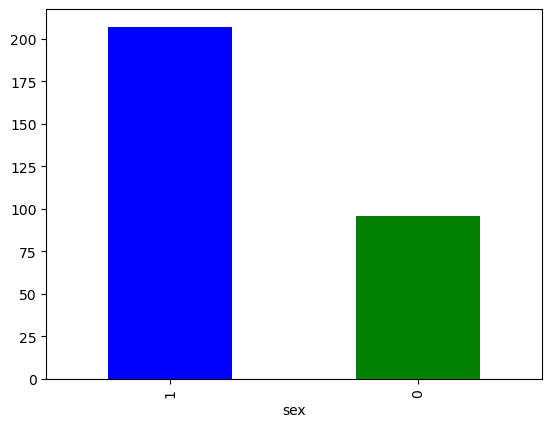

In [13]:
#checking the sex count with help of bar graph
df.sex.value_counts().plot(kind = 'bar' , color =['blue','green'])
plt.show()

#we find in this graph male are more the female

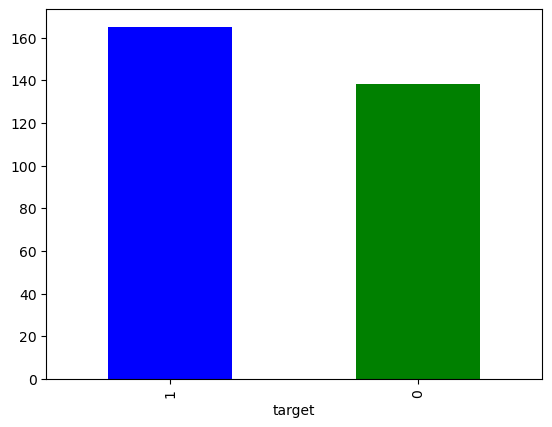

In [14]:
#checking the target count 
df.target.value_counts().plot(kind = 'bar' , color =['blue','green'])
plt.show()

we find in this graph heart disease patient are 160+

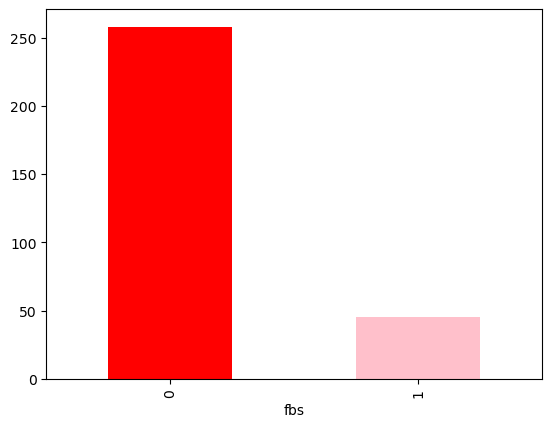

In [15]:
#checking the blood suger level 
df.fbs.value_counts().plot(kind = 'bar', color =['red', 'pink'])
plt.show()

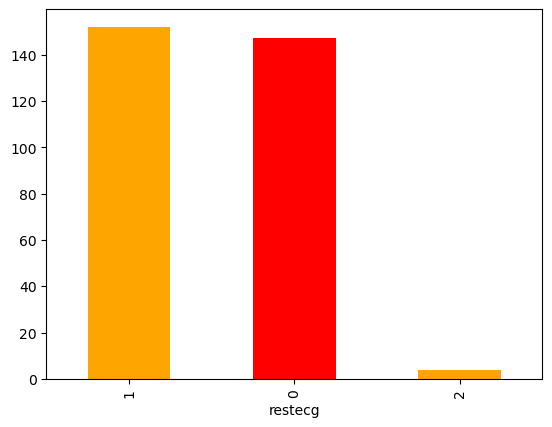

In [16]:
#checking the ECG 
df.restecg.value_counts().plot(kind = 'bar', color =['orange','red'])
plt.show()

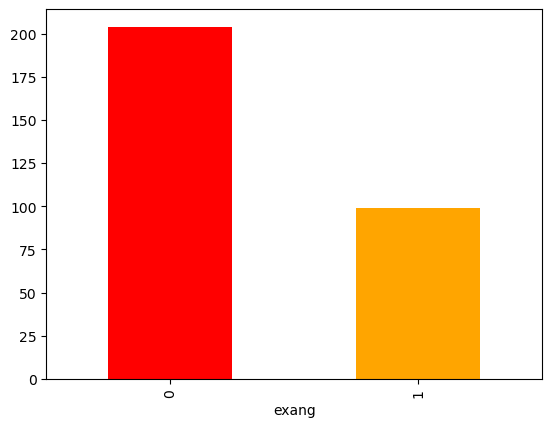

In [17]:
#cheching the Exercise-induced angina
df.exang.value_counts().plot(kind = 'bar' , color = ['red','orange'])
plt.show()

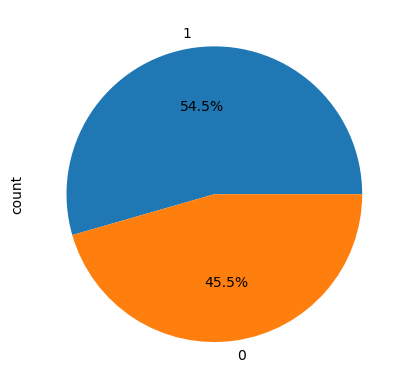

In [18]:
df.target.value_counts().plot(kind ='pie', autopct = '%1.1f%%')
plt.show()

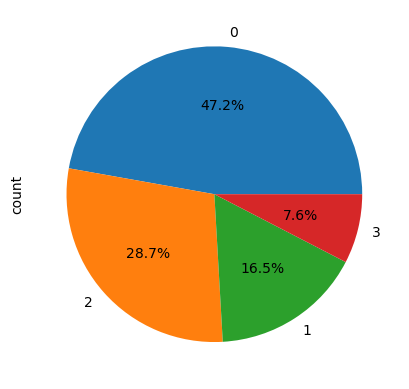

In [19]:
#here we check the Chest pain 
df.cp.value_counts().plot(kind = 'pie', autopct ='%1.1f%%')
plt.show()

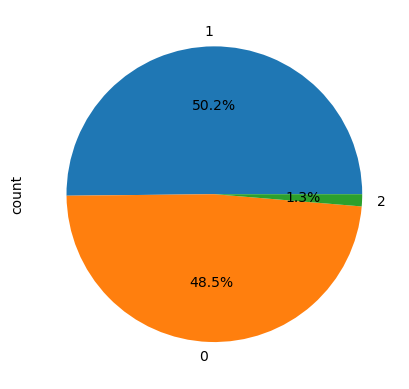

In [20]:
df.restecg.value_counts().plot(kind ='pie', autopct = '%.1f%%')
plt.show()

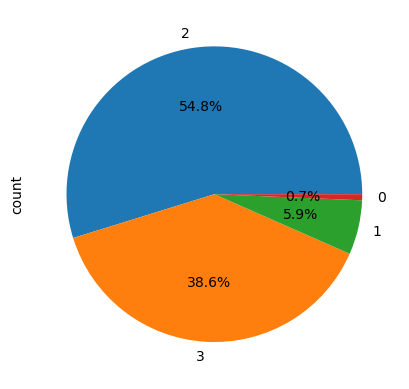

In [21]:
df.thal.value_counts().plot(kind = 'pie' , autopct = '%.1f%%')
plt.show()

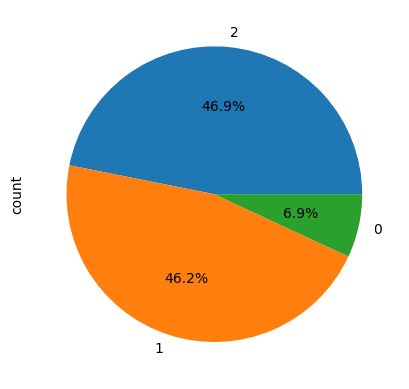

In [22]:
df.slope.value_counts().plot(kind ='pie', autopct = '%.1f%%')
plt.show()

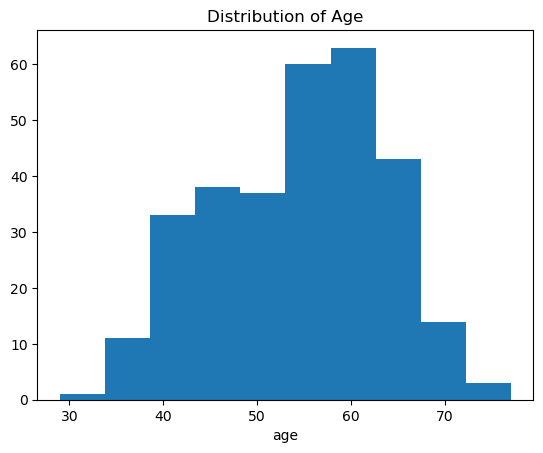

In [23]:
plt.hist(df.age, bins = 10)
plt.xlabel('age')
plt.title('Distribution of Age')
plt.show()

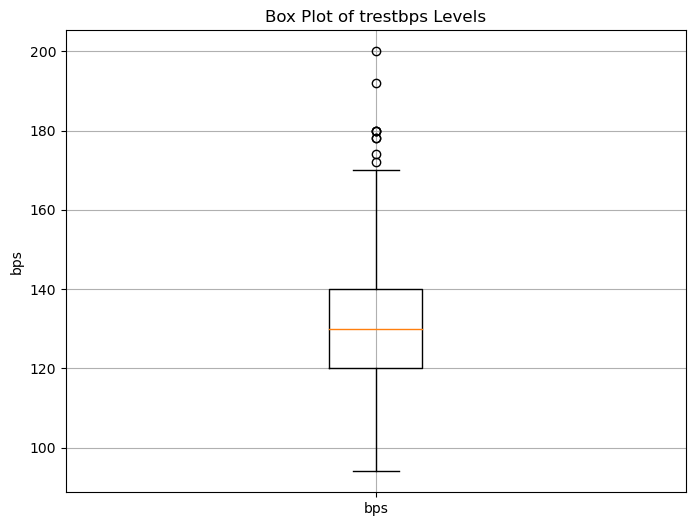

In [24]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['trestbps'])
plt.title('Box Plot of trestbps Levels')
plt.ylabel('bps')
plt.xticks([1], ['bps'])  # Setting x-ticks if needed
plt.grid(True)

# Show plot
plt.show()

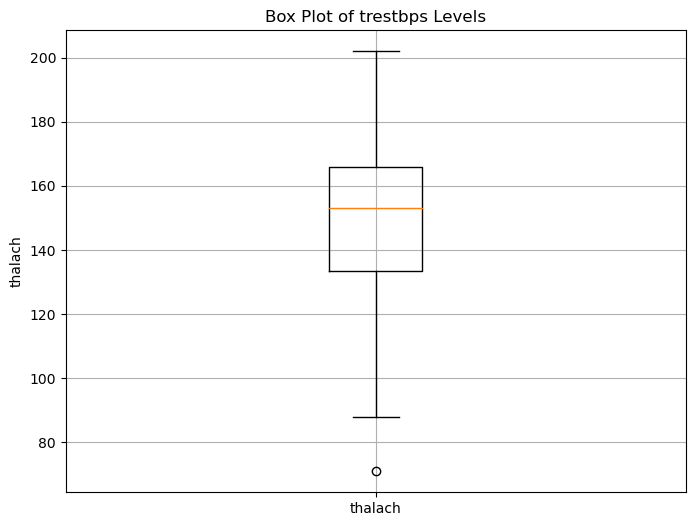

In [25]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['thalach'])
plt.title('Box Plot of trestbps Levels')
plt.ylabel('thalach')
plt.xticks([1], ['thalach'])  # Setting x-ticks if needed
plt.grid(True)

# Show plot
plt.show()

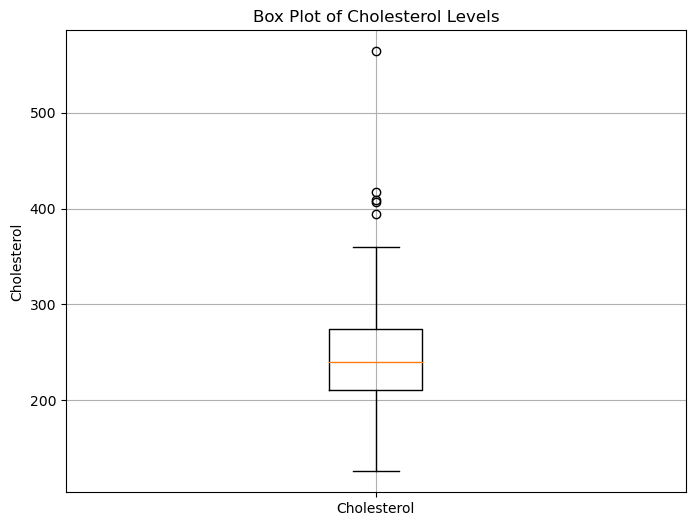

In [26]:
# Plotting
plt.figure(figsize=(8, 6))
plt.boxplot(df['chol'])
plt.title('Box Plot of Cholesterol Levels')
plt.ylabel('Cholesterol')
plt.xticks([1], ['Cholesterol'])  # Setting x-ticks if needed
plt.grid(True)

# Show plot
plt.show()

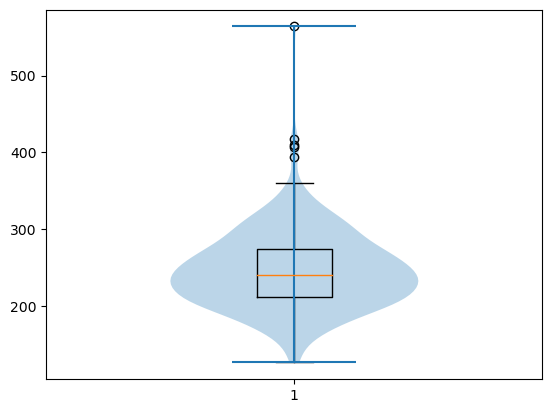

In [27]:
#here we how many cholesterol with help of box plot it shows us outlier 
plt.boxplot(df.chol)
plt.violinplot(df.chol)
plt.show()

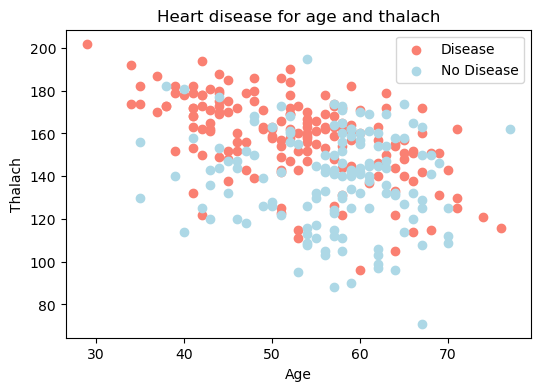

In [28]:
#here we check the heart disease as pr age and Maximum heart rate achieved during a stress test  help or satter plot
plt.figure(figsize=(6,4))

#scatter plot with heart disease positive example
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c='salmon')

#scatter plot with heart disease negative example
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c='lightblue')

plt.title('Heart disease for age and thalach')
plt.xlabel('Age')
plt.ylabel('Thalach')
plt.legend(['Disease','No Disease'])
plt.show()

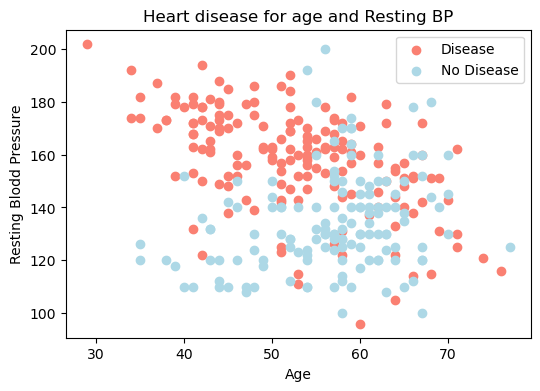

In [29]:
#here we check the heart disease as pr age and BP help or satter plot
plt.figure(figsize=(6,4))

#scatter plot with heart disease positive example
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c='salmon')

#scatter plot with heart disease negative example
plt.scatter(df.age[df.target==0],
           df.trestbps[df.target==0],
           c='lightblue')

plt.title('Heart disease for age and Resting BP')
plt.xlabel('Age')
plt.ylabel('Resting Blodd Pressure')
plt.legend(['Disease','No Disease'])
plt.show()

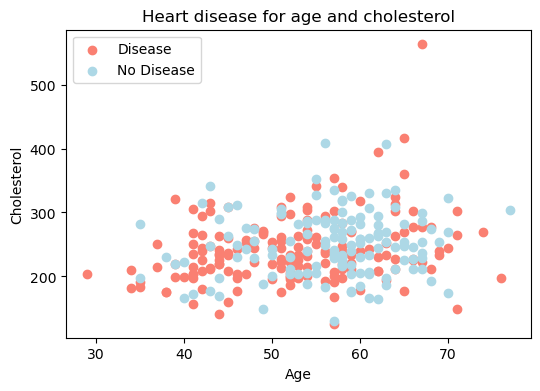

In [30]:
#here we check the heart disease as pr age and cholesterol help or satter plot
plt.figure(figsize=(6,4))

#scatter plot with heart disease positive example
plt.scatter(df.age[df.target==1],
           df.chol[df.target==1],
           c='salmon')

#scatter plot with heart disease negative example
plt.scatter(df.age[df.target==0],
           df.chol[df.target==0],
           c='lightblue')

plt.title('Heart disease for age and cholesterol')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend(['Disease','No Disease'])
plt.show()

In [31]:
#Separating categorical and continuous columns
categorical = []
continuous = []
for column in df.columns:
    if len(df[column].unique()) <= 10:
        categorical.append(column)
    else:
        continuous.append(column)

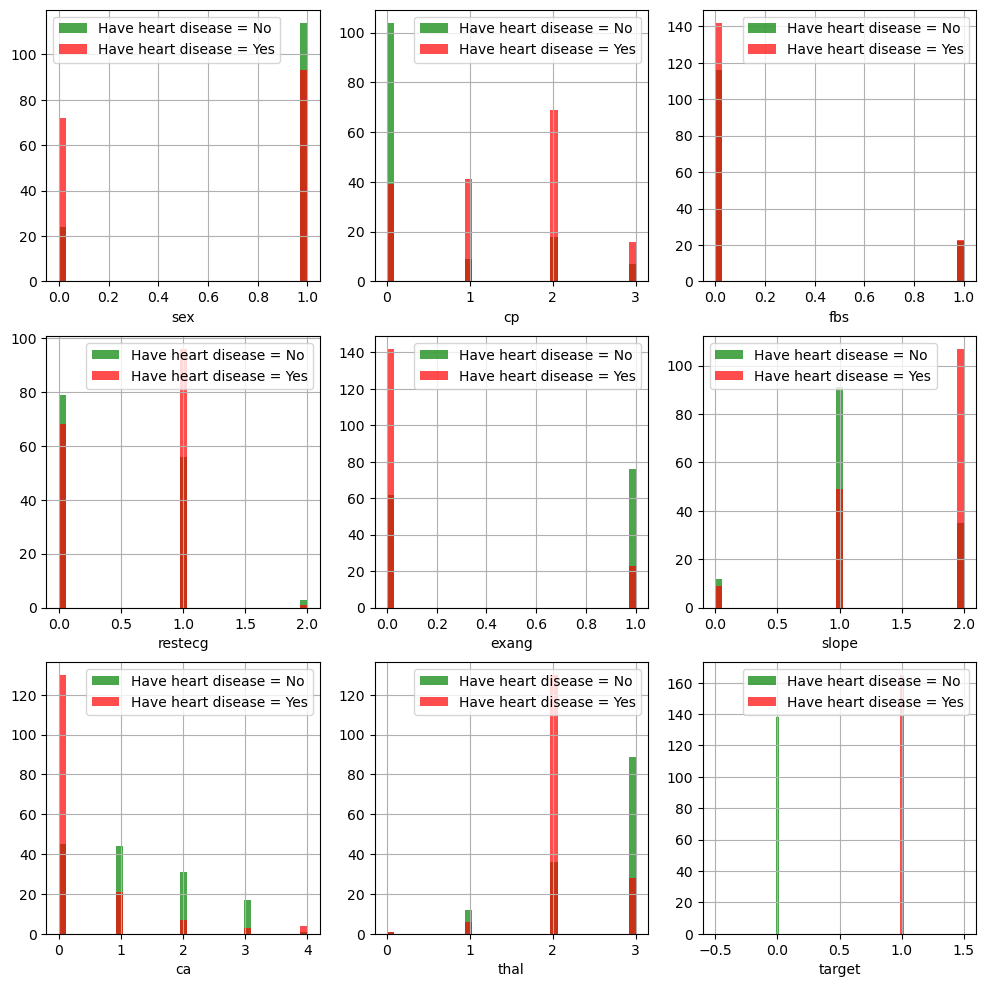

In [32]:
plt.figure(figsize=(12,12))

for i, column in enumerate(categorical, 1):
    plt.subplot(3,3,i)
    df[df['target']==0][column].hist(bins=35, color='green',label='Have heart disease = No',alpha=0.7)
    df[df['target']==1][column].hist(bins=35, color='red',label='Have heart disease = Yes',alpha=0.7)
    plt.legend()
    plt.xlabel(column)

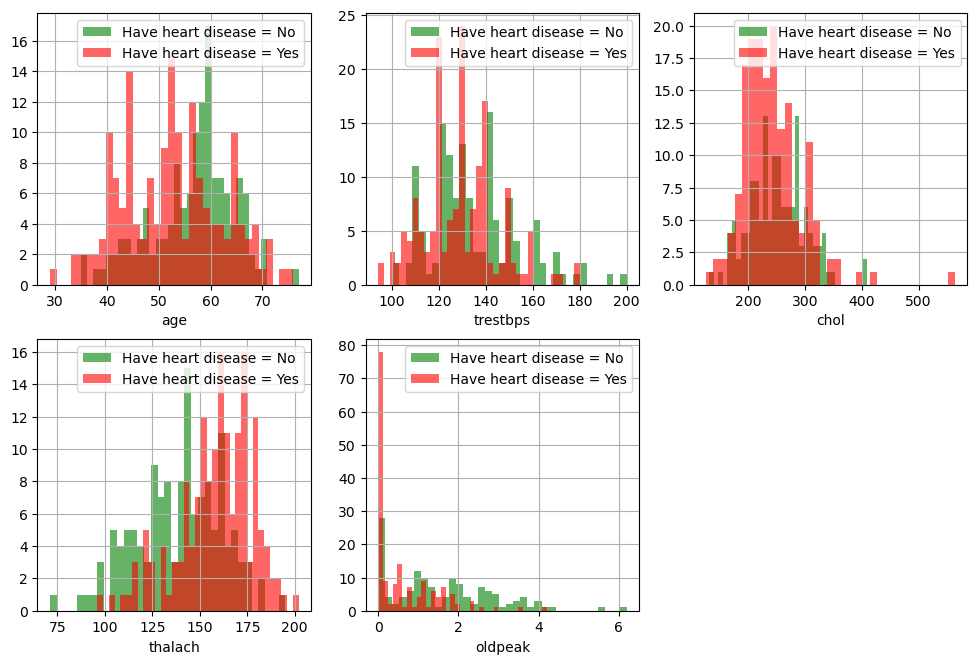

In [33]:
plt.figure(figsize=(12,12))

for i, column in enumerate(continuous, 1):
    plt.subplot(3,3,i)
    df[df['target']==0][column].hist(bins=35, color='green',label='Have heart disease = No',alpha=0.6)
    df[df['target']==1][column].hist(bins=35, color='red',label='Have heart disease = Yes',alpha=0.6)
    plt.legend()
    plt.xlabel(column)

C:\Users\Apoorv Bajpai\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


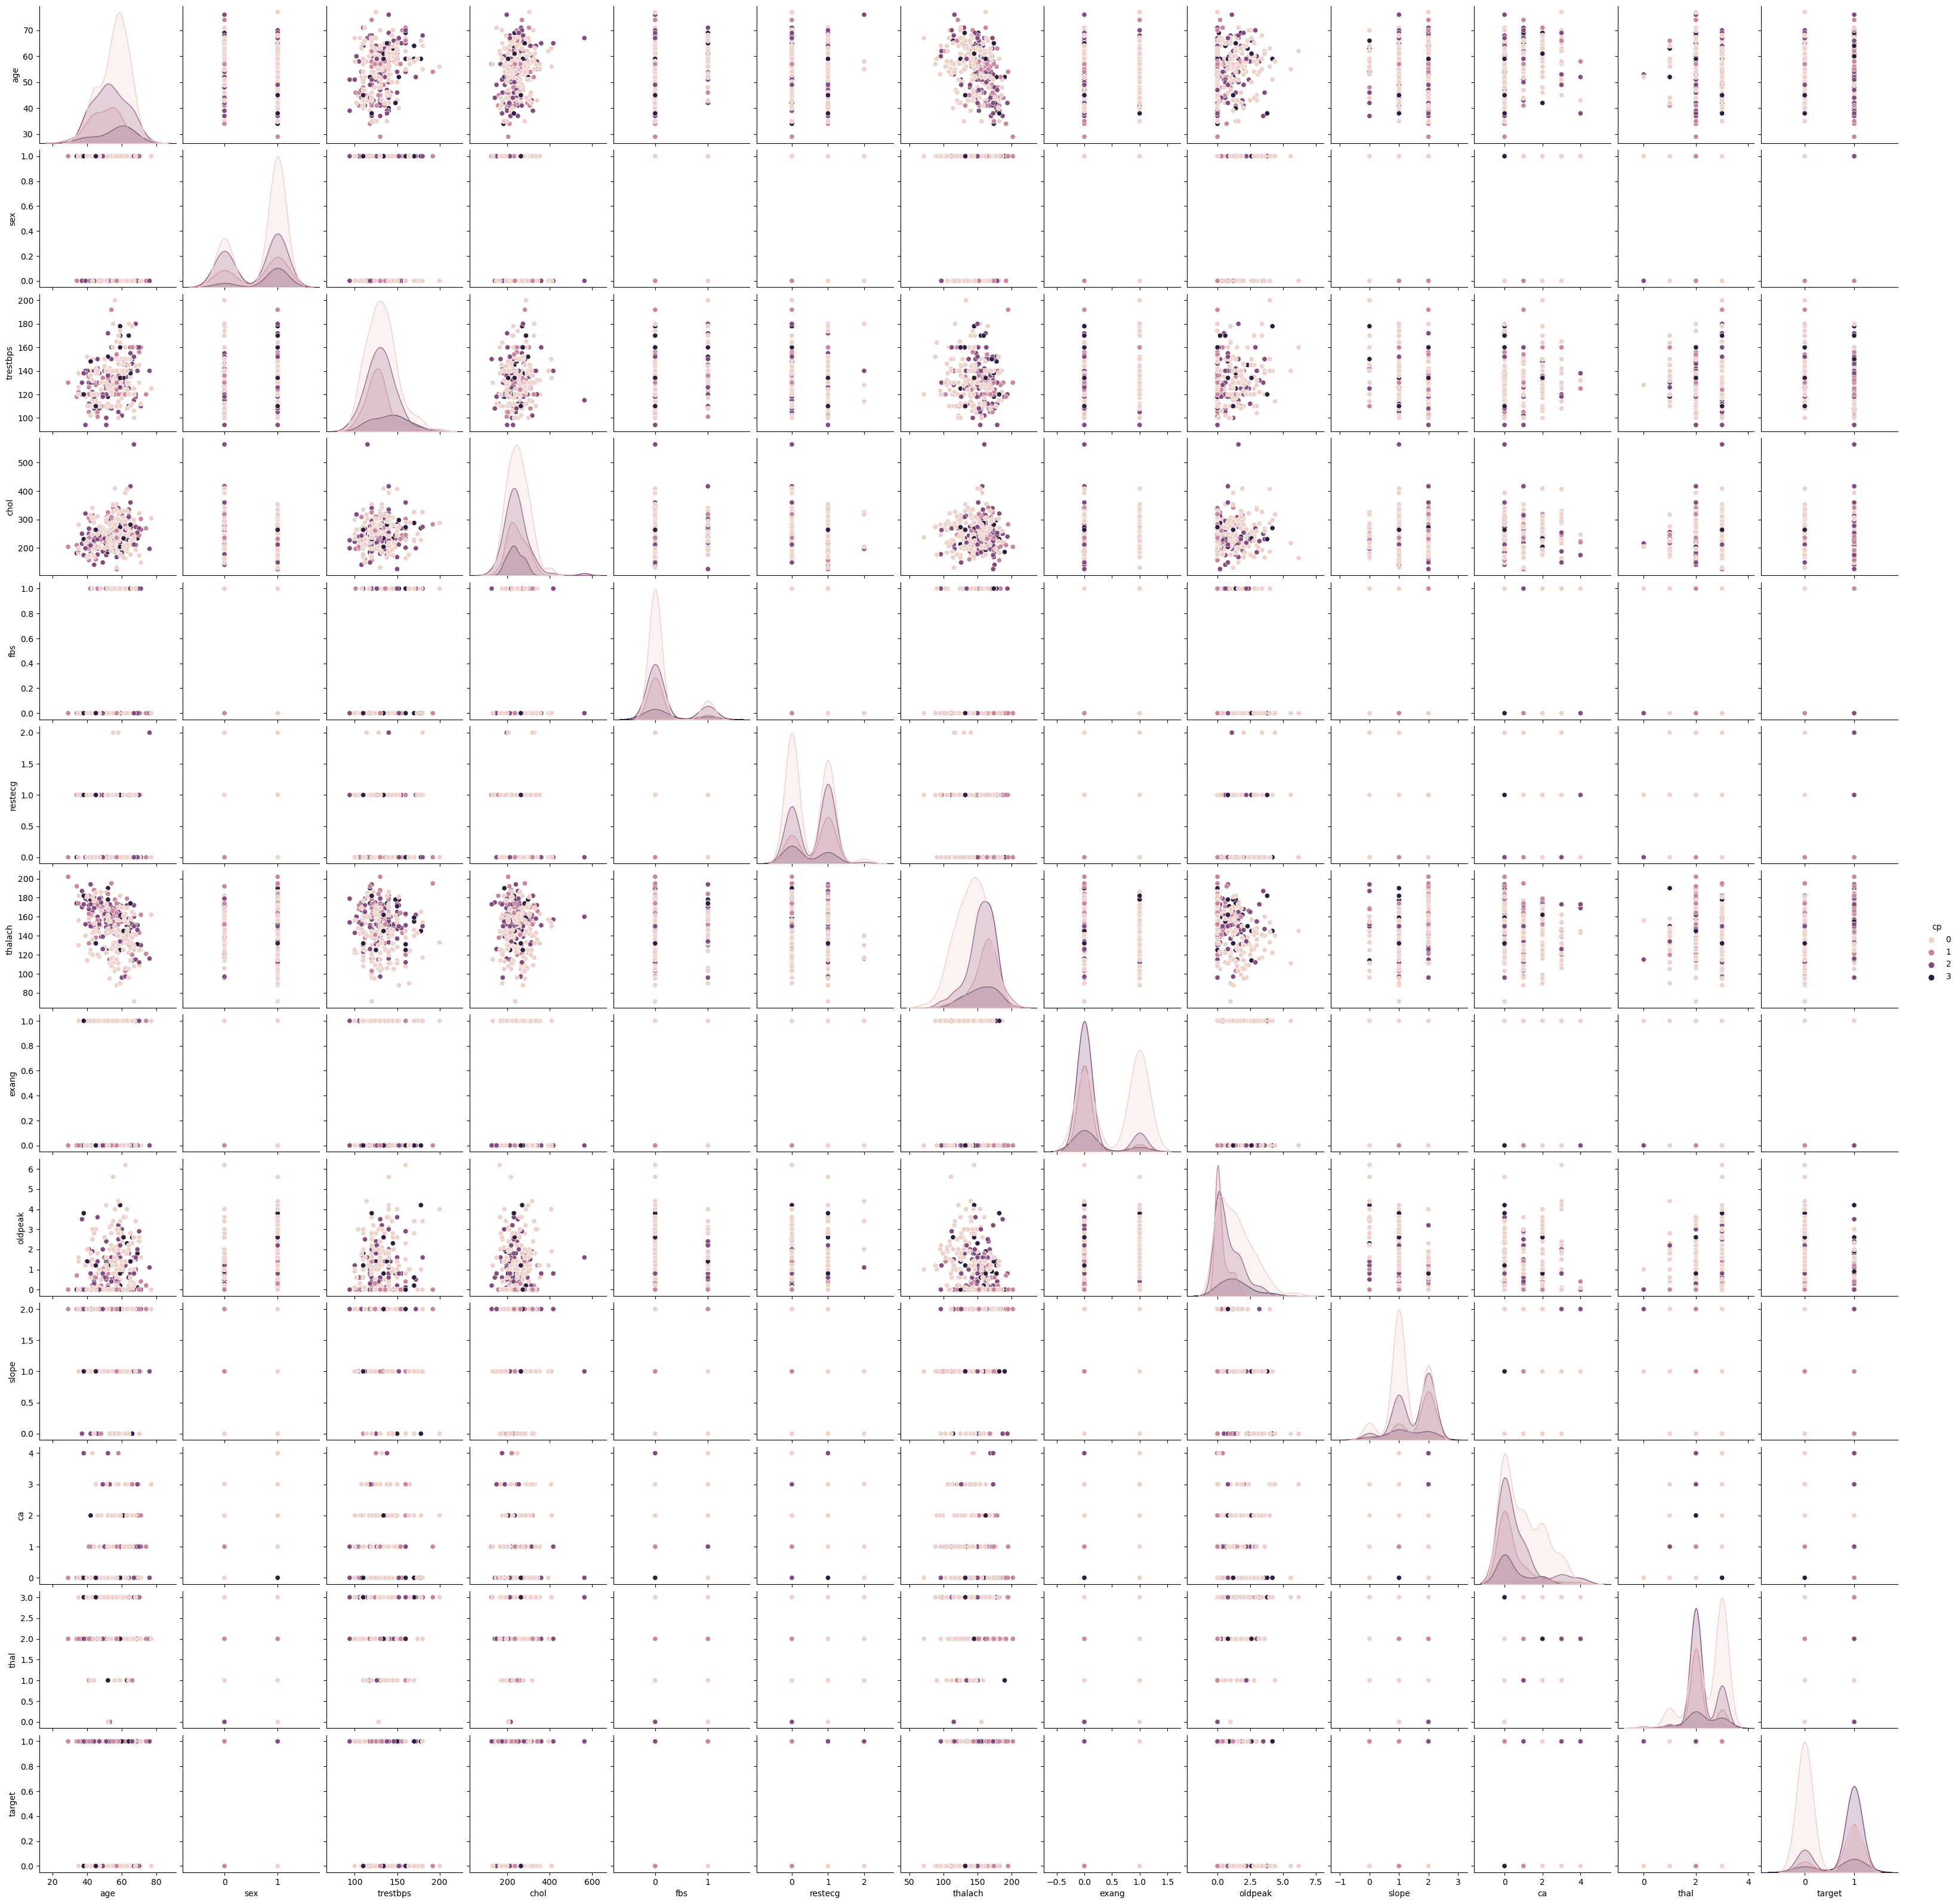

In [34]:
sns.pairplot(df, hue = 'cp')

C:\Users\Apoorv Bajpai\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


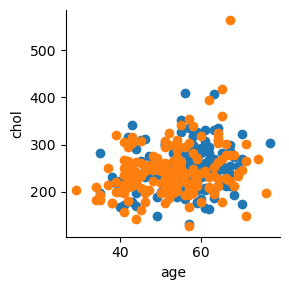

In [35]:
sns.FacetGrid(df, hue = 'target')\
.map(plt.scatter, 'age','chol' )
plt.show()

# Machine Learning

In [36]:
#Spltting input and output
X = df.iloc[:,:-1]
y = df.iloc[:,-1] 

In [37]:
print(X.shape)
print(y.shape)

(303, 13)
(303,)


In [38]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [39]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [40]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [42]:
accuracy_score(y_test, y_pred)*100

72.36842105263158

In [43]:
#Applying Logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [44]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

C:\Users\Apoorv Bajpai\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [46]:
acc_score = accuracy_score(y_test, y_pred)*100

In [47]:
accuracies = []
accuracies.append(acc_score)

In [48]:
#Applying Decision Tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
acc = accuracy_score(y_test, y_pred)*100
acc

80.26315789473685

In [49]:
accuracies.append(acc)

In [50]:
#applying KNN
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)
y_prd = model.predict(x_test)
acc_sc = accuracy_score(y_test, y_prd)*100
acc_sc

59.210526315789465

In [51]:
accuracies.append(acc_sc)

In [52]:
#Applying Support vector machine
from sklearn.svm import SVC
model = SVC()
model.fit(x_train, y_train)
y_prd = model.predict(x_test)
acc = accuracy_score(y_test, y_prd)*100
acc

59.210526315789465

In [53]:
accuracies.append(acc)

In [54]:
#Applying Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)
y_prd = model.predict(x_test)
acc = accuracy_score(y_test, y_prd)*100
acc

78.94736842105263

In [55]:
accuracies.append(acc)

In [56]:
classifiers = ['Logistic regression','Decision Tree','KNN', 'SVM','Naive Bayes']

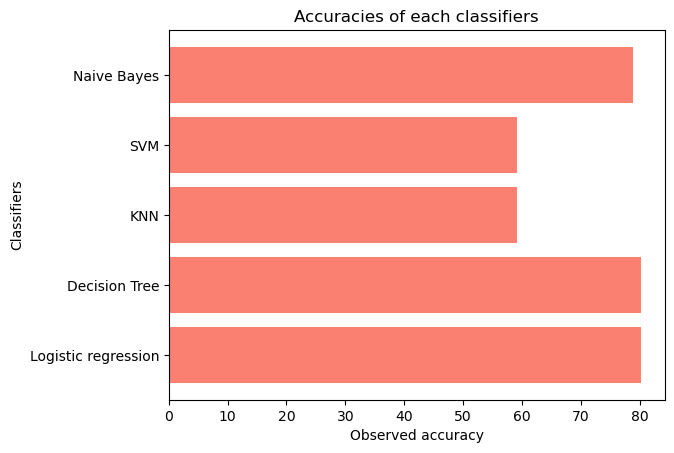

In [57]:
plt.barh(classifiers, accuracies, color = 'salmon')
plt.title('Accuracies of each classifiers')
plt.xlabel('Observed accuracy')
plt.ylabel('Classifiers')
plt.show()

In [58]:
k_values = [1,2,3,4,5,6,7]
accuracies = []
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracies.append(accuracy_score(y_test, y_pred))

In [59]:
accuracies

[0.6710526315789473,
 0.6447368421052632,
 0.5789473684210527,
 0.631578947368421,
 0.5921052631578947,
 0.631578947368421,
 0.618421052631579]

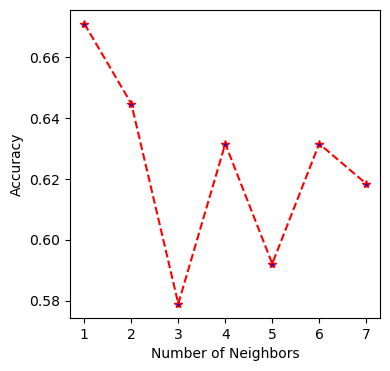

In [60]:
#plotting k values versus accuracy
plt.figure(figsize=(4,4))
plt.plot(k_values, accuracies, color = 'red', linestyle = 'dashed',
        marker = '*', markerfacecolor = 'blue')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [61]:
def get_unique_characters(input_string):
    unique_chars = set(input_string)
    unique_string = ''.join(unique_chars)
    return unique_string


def main():
    
    user_input = input("Enter a string: ")
    unique_chars = get_unique_characters(user_input)
    print("Unique characters in the string are:", unique_chars)

if __name__ == "__main__":
    main()


Enter a string: apoorv bajpai
Unique characters in the string are: op brviaj
